# A Look at the TCGA RNA-seq Dataset

In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
df = pd.read_table('unaligned.tsv', sep='\t')

In [6]:
df = df[['analysis_id', 'disease_name', 'center', 'files_size']]
df['files_size'] = df['files_size'] / 1024.0 / 1024 / 1024
df.rename(columns = {'files_size':'size_GB'}, inplace=True)

In [7]:
df.head()

,analysis_id,disease_name,center,size_GB
0,5557a728-1827-4aff-b28b-f004d835f9d6,Head and Neck squamous cell carcinoma,UNC-LCCC,5.353189
1,2826301c-5d33-465a-99fa-401aea553a7f,Prostate adenocarcinoma,UNC-LCCC,5.292468
2,bb9ecd73-ded7-4c4e-9674-d05647be7a22,Liver hepatocellular carcinoma,UNC-LCCC,4.354037
3,f23c04eb-6f22-4b19-a6e3-90e7887f535e,Brain Lower Grade Glioma,UNC-LCCC,5.456621
4,8aef55bf-eeca-40ac-9025-fff4fbcf1c24,Lung squamous cell carcinoma,UNC-LCCC,6.211421


In [8]:
print 'Number of samples: %i' % len(df)
print 'Min: %.2fGB' % min(df['size_GB'])
print 'Max: %.2fGB' % max(df['size_GB'])
print 'Avg: %.2fGB' % np.mean(df['size_GB'])
print 'Total: %.2fGB or %.2fTB' % (sum(df['size_GB']), sum(df['size_GB'] / 1024))

Number of samples: 11194
Min: 0.27GB
Max: 27.69GB
Avg: 6.18GB
Total: 69228.23GB or 67.61TB


<h5 align="center">Boxplot Reminder</h5> 

<img src="boxplot.png", style="width: 500px">

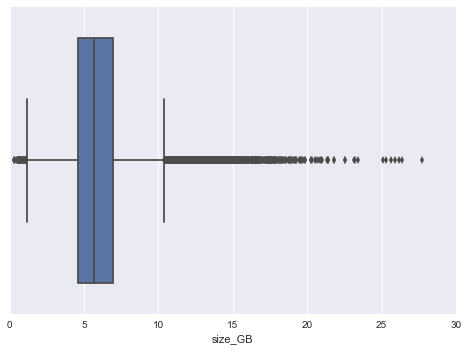

In [9]:
sns.boxplot(df['size_GB']);

Rerun the below cell to see a random sample of file sizes from the unaligned TCGA cohort

In [27]:
for i in xrange(10):
    id = df.iloc[random.randint(1,11194)]['analysis_id']
    print 'Size of random sample: %.2fGB' % (df[df['analysis_id'] == id]['size_GB'])

Size of random sample: 9.44GB
Size of random sample: 4.99GB
Size of random sample: 12.51GB
Size of random sample: 5.60GB
Size of random sample: 4.77GB
Size of random sample: 5.83GB
Size of random sample: 5.76GB
Size of random sample: 3.76GB
Size of random sample: 8.14GB
Size of random sample: 6.23GB


This data only looks at unaligned RNA-seq data. Now let's look at the complete TCGA RNA-seq dataset.

In [10]:
full_df = pd.read_table('summary.tsv', sep='\t')

In [11]:
full_df = full_df[['analysis_id', 'disease_name', 'assembly', 'center', 'files_size']]
full_df['files_size'] = full_df['files_size'] / 1024.0 / 1024 / 1024
full_df.rename(columns = {'files_size':'size_GB'}, inplace=True)

In [12]:
full_df.head()

,analysis_id,disease_name,assembly,center,size_GB
0,5557a728-1827-4aff-b28b-f004d835f9d6,Head and Neck squamous cell carcinoma,unaligned,UNC-LCCC,5.353189
1,e6091244-6442-4977-903f-771a9eae0b11,Head and Neck squamous cell carcinoma,HG19,UNC-LCCC,5.814064
2,2826301c-5d33-465a-99fa-401aea553a7f,Prostate adenocarcinoma,unaligned,UNC-LCCC,5.292468
3,8116865e-8280-49fe-ad4b-c2a0d1bf7a37,Prostate adenocarcinoma,HG19,UNC-LCCC,5.707248
4,bb9ecd73-ded7-4c4e-9674-d05647be7a22,Liver hepatocellular carcinoma,unaligned,UNC-LCCC,4.354037


In [13]:
print 'Number of samples: %i' % len(full_df)
print 'Min: %.2fGB' % min(full_df['size_GB'])
print 'Max: %.2fGB' % max(full_df['size_GB'])
print 'Avg: %.2fGB' % np.mean(full_df['size_GB'])
print 'Total: %.2fGB or %.2fTB' % (sum(full_df['size_GB']), sum(full_df['size_GB'] / 1024))

Number of samples: 25327
Min: 0.13GB
Max: 45.53GB
Avg: 6.69GB
Total: 169421.20GB or 165.45TB


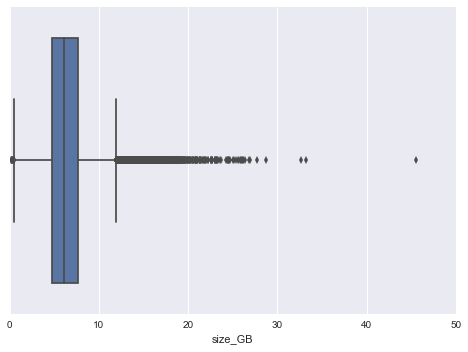

In [14]:
sns.boxplot(full_df['size_GB']);

Let's look at both sets in a narrower range

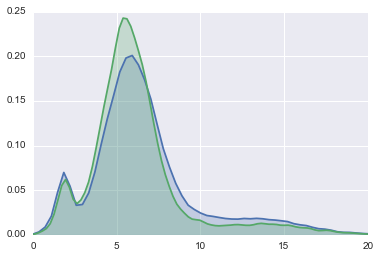

In [42]:
sns.kdeplot(full_df['size_GB'], shade=True, legend=False)
sns.kdeplot(df['size_GB'], shade=True, legend=False)
plt.xlim([0, 20]);